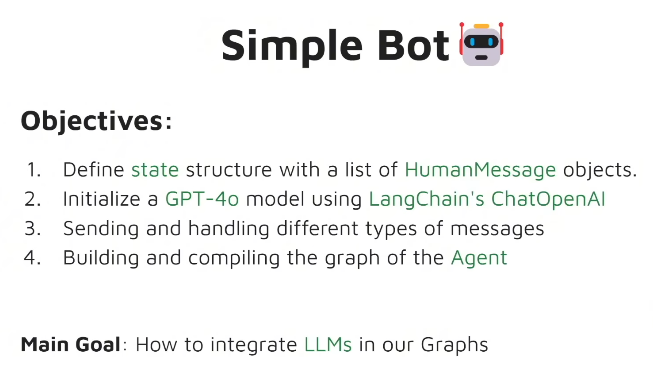

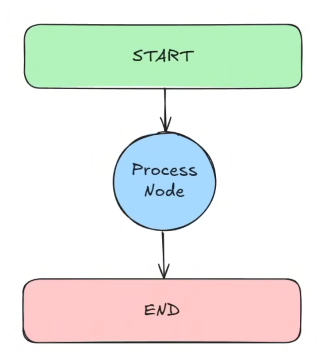

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [2]:
load_dotenv()

class AgentState(TypedDict):
    messages: List[HumanMessage]

llm = ChatOpenAI(model="gpt-4o")

def process(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print(f"\nAI: {response.content}")
    return state

In [3]:
graph = StateGraph(AgentState)
graph.add_node("process", process)

graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

ISSUE: It does not remember previous messages, because we are not adding previous messages to the state.

In [7]:
user_input = input("Enter: ")
while user_input != "exit":
    agent.invoke({"messages": [HumanMessage(content=user_input)]})
    user_input = input("Enter: ")


AI: Hello Sevgi! How can I assist you today?

AI: I'm sorry, but I don't have access to personal data about individuals. Therefore, I can't know your name. If you need assistance with something specific, feel free to let me know!

AI: Hello! How can I assist you today?
